<a href="https://colab.research.google.com/github/Bimal999/python/blob/main/Ad_project_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 11.8MB/s]


In [65]:
import pandas as pd
df=pd.read_csv('ads.csv')

In [66]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [68]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [69]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

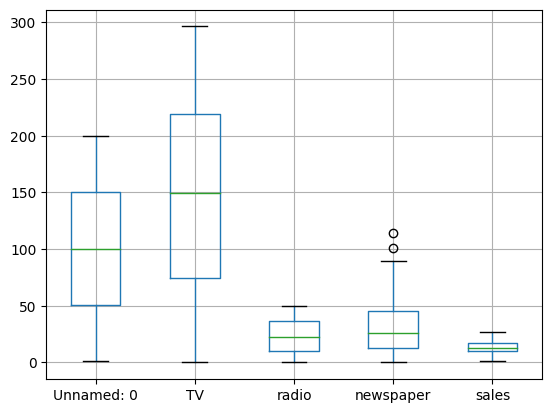

In [71]:
df.boxplot()

In [72]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

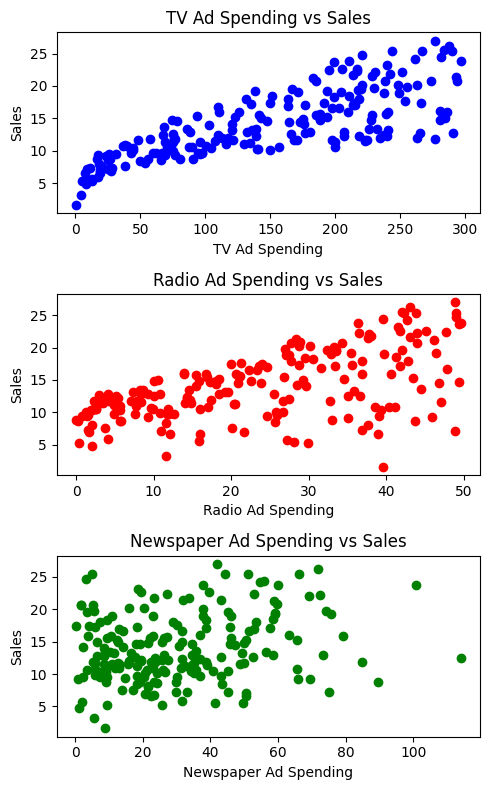

In [73]:

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(5, 8))

# TV vs Sales
ax[0].scatter(df['TV'], df['sales'], color='blue')
ax[0].set_xlabel('TV Ad Spending')
ax[0].set_ylabel('Sales')
ax[0].set_title('TV Ad Spending vs Sales')

# Radio vs Sales
ax[1].scatter(df['radio'], df['sales'], color='red')
ax[1].set_xlabel('Radio Ad Spending')
ax[1].set_ylabel('Sales')
ax[1].set_title('Radio Ad Spending vs Sales')

# Newspaper vs Sales
ax[2].scatter(df['newspaper'], df['sales'], color='green')
ax[2].set_xlabel('Newspaper Ad Spending')
ax[2].set_ylabel('Sales')
ax[2].set_title('Newspaper Ad Spending vs Sales')

plt.tight_layout()
plt.show()

In [74]:
# Calculate correlation between each type of advertising and sales
correlations = df[['TV', 'radio', 'newspaper', 'sales']].corr()['sales'].drop('sales')
print("Correlations with Sales:")
print(correlations)

Correlations with Sales:
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64


This shows that while spending the advertising amount on tv add result more sales but newspaper ad spending have less sales result

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Prepare the data
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [77]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)



LinearRegression()

In [94]:
y_pred = model_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
result[model_lr]= {'MSE': mse, 'R2': r2}
result

{'MSE': 3.1740973539761033,
 'R2': 0.899438024100912,
 LinearRegression(): {'MSE': 3.1740973539761033, 'R2': 0.899438024100912}}

In [93]:
model_tree=DecisionTreeRegressor()
model_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [95]:
y_pred = model_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results[model_tree] = {'MSE': mse, 'R2': r2}
results

{LinearRegression(): {'MSE': 3.1740973539761033,
  'R2': 0.899438024100912,
  LinearRegression(): {'MSE': 3.1740973539761033, 'R2': 0.899438024100912}},
 DecisionTreeRegressor(): {'MSE': 1.7262500000000003,
  'R2': 0.9453088259317746}}

In [82]:
model_forest=RandomForestRegressor()
model_forest.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
y_pred = model_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
results[model_forest] = {'MSE': mse, 'R2': r2}
results



{'Random Forest Regression': {'MSE': 3.1740973539761033,
  'R2': 0.899438024100912},
 LinearRegression(): {'MSE': 3.1740973539761033, 'R2': 0.899438024100912},
 DecisionTreeRegressor(): {'MSE': 1.5445000000000002,
  'R2': 0.9510670422312097},
 RandomForestRegressor(): {'MSE': 0.628338924999999, 'R2': 0.9800929219284481},
 LinearRegression(): {'MSE': 3.1740973539761033, 'R2': 0.899438024100912},
 DecisionTreeRegressor(): {'MSE': 1.6982500000000003,
  'R2': 0.9461959239036271},
 RandomForestRegressor(): {'MSE': 0.5423436249999981,
  'R2': 0.9828174310791211}}